In [9]:
%matplotlib inline

import numpy as np

from mars_clock.Ls_utils import *
from mars_clock.mission_sols import *
from astropy.time import Time

import pandas as pd
import matplotlib.pyplot as plt

In [53]:
import astropy.units as u
import pandas as pd

# Define some constants
Mars_hours_per_sol = 24.
Mars_minutes_per_hour = 60.
Mars_seconds_per_minute = 60.
# By definition, there are 24*60*60 Mars seconds per sol using local mean solar time.
Mars_seconds_per_sol = 24.*60.*60.

class Clock(object):
    """
    This object provides some basics for keeping track of time on Mars.
    
    Clock assumes there are 60 seconds per minute, 60 minutes for hour, 24 hours per sol.
    This approach is useful when dealing with local true solar time and local mean solar time.
    See https://www.giss.nasa.gov/tools/mars24/help/notes.html for details.
    """
    
    def __init__(self, time, time_format=None, 
                 mars_year=None, Ls=None, mission_name=None, mission_sol=None, longitude=None, latitude=None):
        """
        Args:
            time (float or str or array of floats or strs): time
            time_format (str, optional): If None, then time must be the number of seconds since midnight for the
            given mission sol. 
            mars_year (int or array of ints): should have same number of elements as time; 
            not used yet but included for future functionality
            Ls (float or array of floats): should have same number of elements as time; 
            not used yet but included for future functionality
            mission_name (str, optional): name of mission for which times are collected; not used yet but 
            included for future functionality
            mission_sol (int, optional): mission sol; also included for future functionality
            longitude/latitude (optional): included for future functionality
        """
        
        self.mars_year = mars_year
        self.mission_name = mission_name
        self.mission_sol = mission_sol
        self.longitude = longitude
        self.latitude = latitude
        
        # If time_format is not given, the code assumes it represents the number of seconds since midnight
        if(time_format is None):
            self.time = time*u.second
            
        elif(isinstance(time_format, str)):
            # I want to use panda.datetime time format interpretation but NOT the year-month-day information
            cur_time = pd.to_datetime(time, format=time_format)
            
            print(cur_time.hour.dtype)#, cur_time.minute, cur_time.second)
            
            self.time = cur_time.time

1.0 s
int64
[datetime.time(12, 0, 0, 500000) datetime.time(12, 0, 1, 500000)
 datetime.time(12, 0, 2, 500000)]


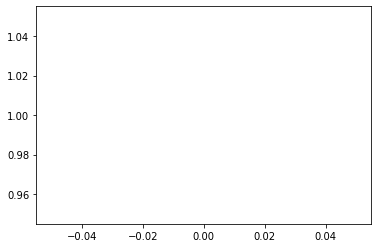

In [54]:
time = 1.
c = Clock(time)
plt.plot(c.time)
print(c.time)

other_time = ["12:00:00.5", "12:00:01.5", "12:00:02.5"]
other_c = Clock(other_time, time_format="%H:%M:%S.%f")
print(other_c.time)

In [ ]:
    # Define some constants
    
    # See https://www.giss.nasa.gov/tools/mars24/help/notes.html for details.

    LMST_Mars_hours_per_sol = 24.
    LMST_Mars_minutes_per_hour = 60.
    LMST_Mars_seconds_per_minute = 60.
    
    # By definition, there are 24*60*60 Mars seconds per sol using local mean solar time.
    LMST_Mars_seconds_per_sol = 24.*60.*60.